<a href="https://colab.research.google.com/github/vmcarranzam/sl2/blob/main/CNNSL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Carga de librerías

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from PIL import Image

##Carga de dataset CIFAR10, incluído en TensorFlow

El dataset está conformado por imágenes de animales y objetos. Se divide en cinco tandas para entrenamiento y una para validación, cada una con 10000 imágenes. La tanda de validación contiene 1000 imágenes seleccionadas aleatoriamente de cada clase del dataset.



In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


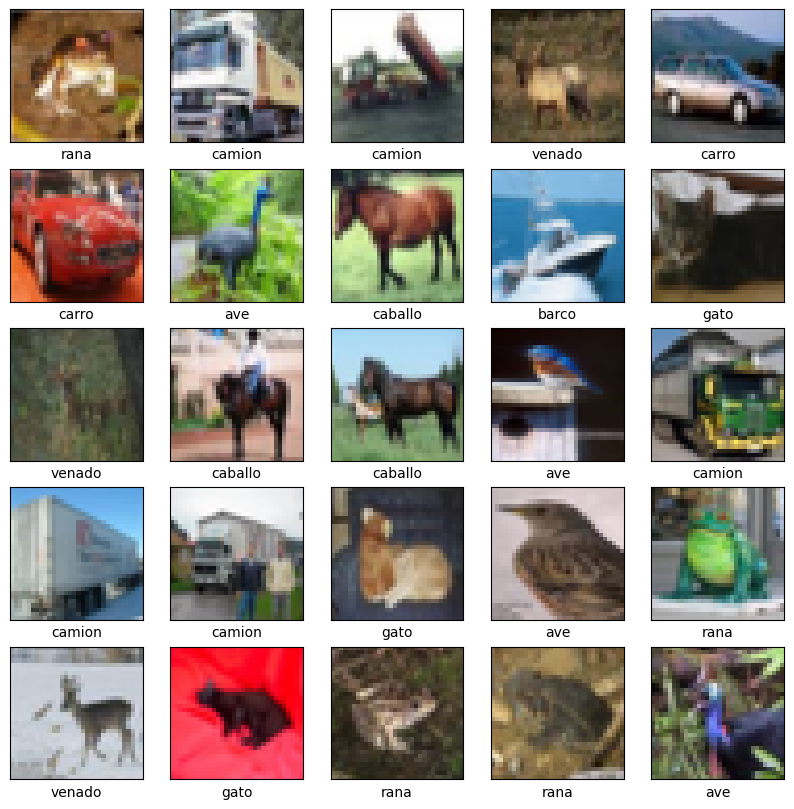

In [3]:
nomnbres_clases = ['avion', 'carro', 'ave', 'gato', 'venado',
               'perro', 'rana', 'caballo', 'barco', 'camion']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(nomnbres_clases[train_labels[i][0]])
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.5120 - accuracy: 0.4484 - val_loss: 1.2233 - val_accuracy: 0.5680
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1310 - accuracy: 0.5986 - val_loss: 1.0597 - val_accuracy: 0.6228
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9800 - accuracy: 0.6586 - val_loss: 1.0366 - val_accuracy: 0.6405
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8858 - accuracy: 0.6905 - val_loss: 0.9355 - val_accuracy: 0.6773
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8157 - accuracy: 0.7150 - val_loss: 0.8731 - val_accuracy: 0.6993
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7559 - accuracy: 0.7363 - val_loss: 0.8507 - val_accuracy: 0.7096
Epoch 7/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7095 - accuracy: 0.7524 - val_loss: 0.8515 -

313/313 - 4s - loss: 0.9558 - accuracy: 0.6960 - 4s/epoch - 13ms/step


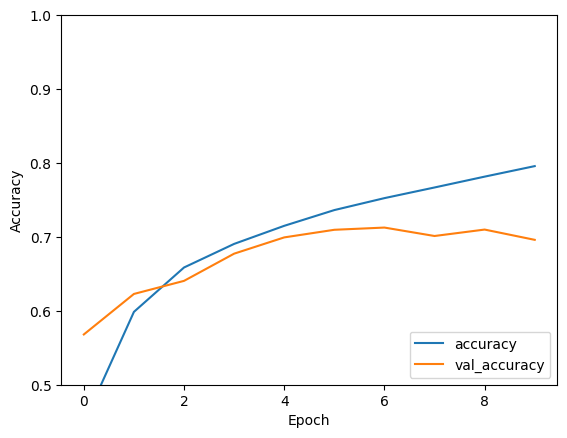

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [22]:
new_image = Image.open('caballo.jpg')
desired_size = (32, 32)
new_image = new_image.resize(desired_size)
new_image_array = np.array(new_image)
new_image_array = new_image_array / 255.0
new_image_array = np.expand_dims(new_image_array, axis=0)
predictions = model.predict(new_image_array)
predicted_class_index = np.argmax(predictions)
predicted_class = nomnbres_clases[predicted_class_index]
print(f'El modelo predice que la imagen es de un {predicted_class}')

1/1 [==============================] - 0s 49ms/step
El modelo predice que la imagen es de un caballo
